In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import numpy as np

In [26]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

# 22512660 % 7 + 1 = 3 -> đề = thứ 4
TOPIC = "Wednesday"
df = df[df['Publication_Day'] == TOPIC]
df.drop(columns="Publication_Day",inplace=True)
df


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
13,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Afternoon,87.87,0.0,Neutral,50.93591
19,19,Sport Spot,Episode 61,51.60,Sports,61.60,Evening,90.41,1.0,Positive,14.96035
20,20,Funny Folks,Episode 100,54.67,Comedy,45.47,Afternoon,NaN,2.0,Neutral,29.22750
22,22,Business Briefs,Episode 54,66.22,Business,62.81,Night,88.86,0.0,Neutral,47.60142
25,25,Tech Trends,Episode 97,105.35,Technology,55.03,Afternoon,76.12,1.0,Neutral,99.15797
...,...,...,...,...,...,...,...,...,...,...,...
749968,749968,Tech Talks,Episode 26,38.79,Technology,52.36,Afternoon,NaN,0.0,Neutral,16.61857
749971,749971,News Roundup,Episode 48,42.43,News,46.80,Afternoon,27.33,2.0,Positive,23.24694
749974,749974,Tech Talks,Episode 94,57.39,Technology,40.66,Night,91.44,3.0,Negative,40.97805
749989,749989,Home & Living,Episode 78,97.51,Lifestyle,91.92,Evening,NaN,3.0,Neutral,56.44464


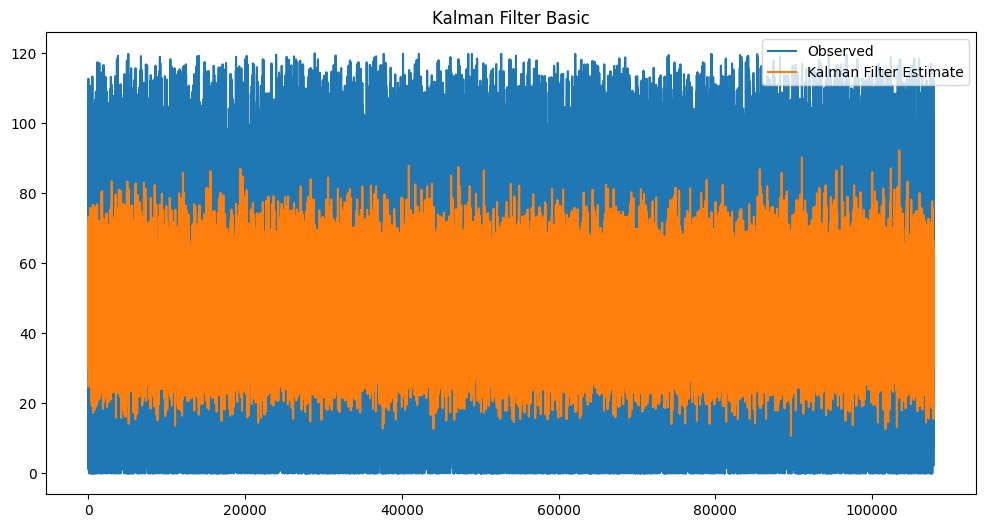

In [ ]:
# Đặt dữ liệu cần phân tích là cột 'Listening_Time_minutes'
observations = df['Listening_Time_minutes'].values

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
state_means, state_covs = kf.em(observations).filter(observations)

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Observed')
plt.plot(state_means, label='Kalman Filter Estimate')
plt.title('Kalman Filter Basic')
plt.legend()
plt.show()


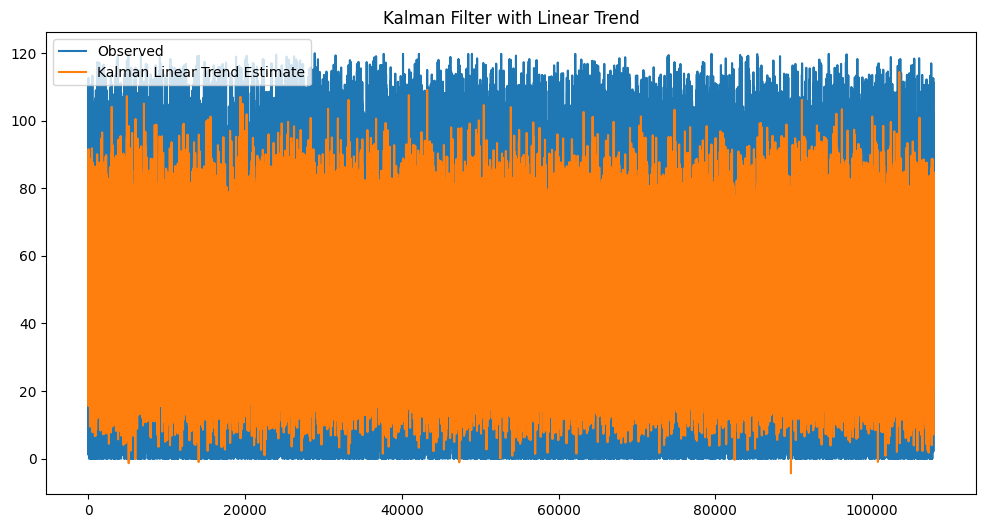

In [29]:
# Khởi tạo với trạng thái 2 chiều: giá trị và xu hướng
transition_matrices = [[1, 1], [0, 1]]
observation_matrices = [[1, 0]]

kf2 = KalmanFilter(
    transition_matrices=transition_matrices,
    observation_matrices=observation_matrices,
    initial_state_mean=[observations[0], 0],
    initial_state_covariance=np.eye(2)
)

kf2 = kf2.em(observations, n_iter=10)
state_means2, _ = kf2.filter(observations)

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(observations, label='Observed')
plt.plot(state_means2[:, 0], label='Kalman Linear Trend Estimate')
plt.title('Kalman Filter with Linear Trend')
plt.legend()
plt.show()


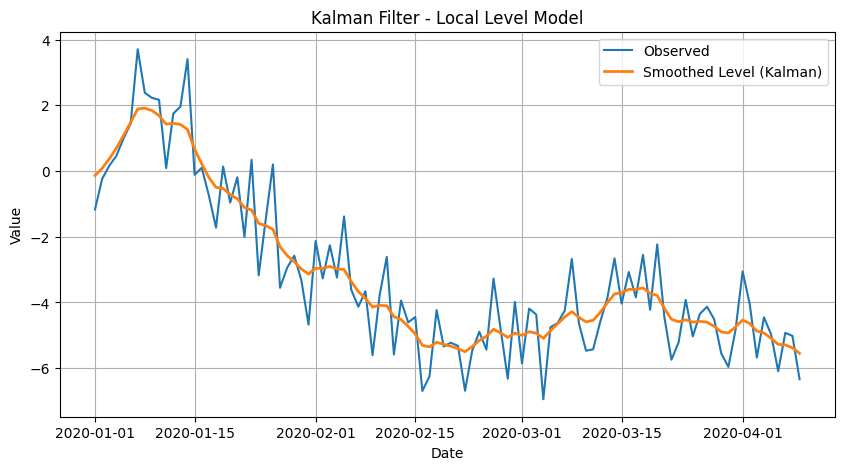

In [9]:
# Trích xuất giá trị mức đã làm mượt
smoothed_level = results.smoothed_state[0]  # Trạng thái đầu tiên là "level"
smoothed_level = pd.Series(smoothed_level, index=ts.index)


# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Observed")
plt.plot(smoothed_level, label="Smoothed Level (Kalman)", linewidth=2)
plt.legend()
plt.title("Kalman Filter - Local Level Model")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()


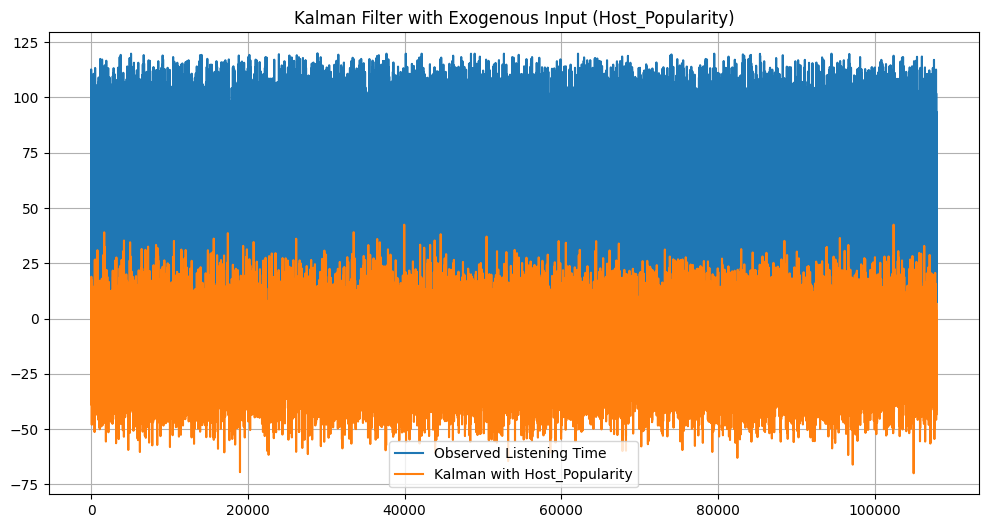

In [33]:
external = df['Host_Popularity_percentage'].values

# Ensure the shape of external matches the shape of observations
if external.shape[0] != observations.shape[0]:
    external = np.resize(external, (observations.shape[0],))

kf3 = KalmanFilter(
    transition_matrices=1.0,
    observation_matrices=1.0,
    observation_offsets=external.reshape(-1, 1)  # Reshape to match expected dimensions
)

kf3 = kf3.em(observations, n_iter=10)
state_means3, _ = kf3.filter(observations)

plt.figure(figsize=(12, 6))
plt.plot(observations, label='Observed Listening Time')
plt.plot(state_means3, label='Kalman with Host_Popularity')
plt.title('Kalman Filter with Exogenous Input (Host_Popularity)')
plt.legend()
plt.grid(True)
plt.show()
